# Results and visualizations
**By Viktor Due Pedersen(vipe) and Aske Schytt Meineche (askm)**

## Imports

In [1]:
import plotting_tools as pt

# Select model experiments
month_dir = "model_outputs/months/"
satellite_dir = "model_outputs/satellites/"
band_dir = "model_outputs/bands_medium/"

## See training / Validation curve

{'num_input_channels': 4, 'conv_filters1': 16, 'conv_filters2': 32, 'conv_filters3': 16, 'num_dpoints': 6000, 'exclude_layer': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'exclude_layer_name': 'S2-B2: Blue-10m, S2-B3: Green-10m, S2-B4: Red-10m, S2-B5: VegRed-704nm-20m, S2-B6: VegRed-740nm-20m, S2-B7: VegRed-780nm-20m, S2-B8: NIR-833nm-10m, S2-B8A: NarrowNIR-864nm-20m, S2-B11: SWIR-1610nm-20m, S2-B12: SWIR-2200nm-20m, S2-CLP: Clouse_gpuudProb-160m', 'num_epochs': 10}


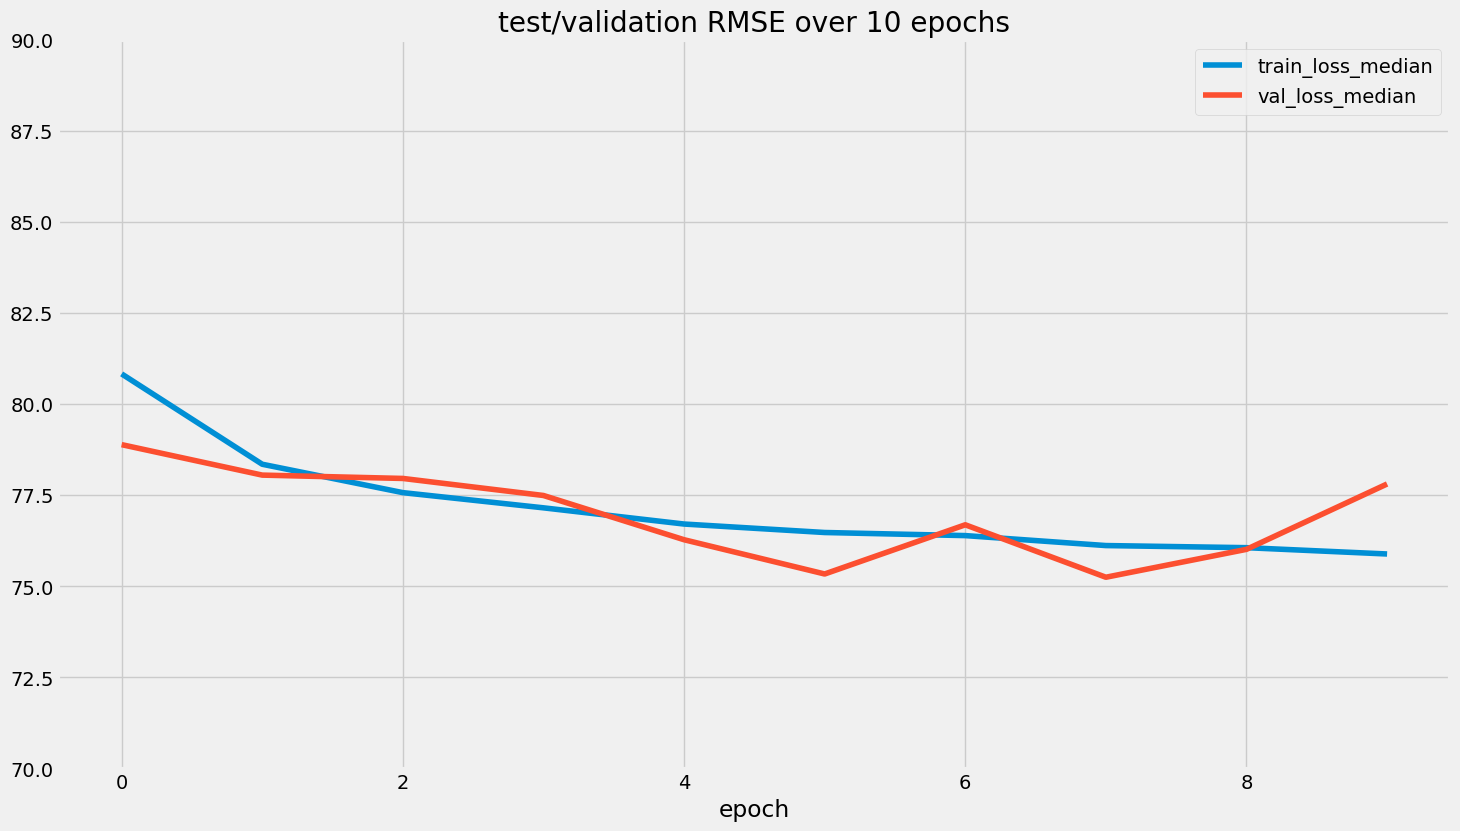

In [2]:
pt.plot_best_config(satellite_dir)

## Performance on months when training on global dataset 

In [9]:
# create subsets
pt.create_monthly_datasets()

# load model
model = pt.get_model_from_path(satellite_dir)
# model.eval()

pt.evaluate_monthly(model)

RuntimeError: Error(s) in loading state_dict for CNN:
	size mismatch for conv1.weight: copying a param with shape torch.Size([16, 11, 3, 3]) from checkpoint, the shape in current model is torch.Size([16, 4, 3, 3]).

## Performance on months when training monthly

EVALUATING MODEL ON Sept


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 29.32it/s]
100it [00:00, 221.86it/s]


EVALUATING MODEL ON Oct


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 34.09it/s]
100it [00:00, 201.96it/s]


EVALUATING MODEL ON Nov


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 32.39it/s]
100it [00:00, 173.39it/s]


EVALUATING MODEL ON Dec


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 37.45it/s]
100it [00:00, 247.19it/s]


EVALUATING MODEL ON Jan


100%|█████████████████████████████████████████| 100/100 [00:03<00:00, 33.13it/s]
100it [00:00, 225.27it/s]


EVALUATING MODEL ON Feb


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 35.77it/s]
100it [00:00, 184.12it/s]


EVALUATING MODEL ON March


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 33.75it/s]
100it [00:00, 171.74it/s]


EVALUATING MODEL ON April


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.30it/s]
100it [00:00, 223.14it/s]


EVALUATING MODEL ON May


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.91it/s]
100it [00:00, 223.85it/s]


EVALUATING MODEL ON June


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 36.16it/s]
100it [00:00, 260.15it/s]


EVALUATING MODEL ON July


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 39.97it/s]
100it [00:00, 229.61it/s]


EVALUATING MODEL ON Aug


100%|█████████████████████████████████████████| 100/100 [00:02<00:00, 38.69it/s]
100it [00:00, 266.88it/s]


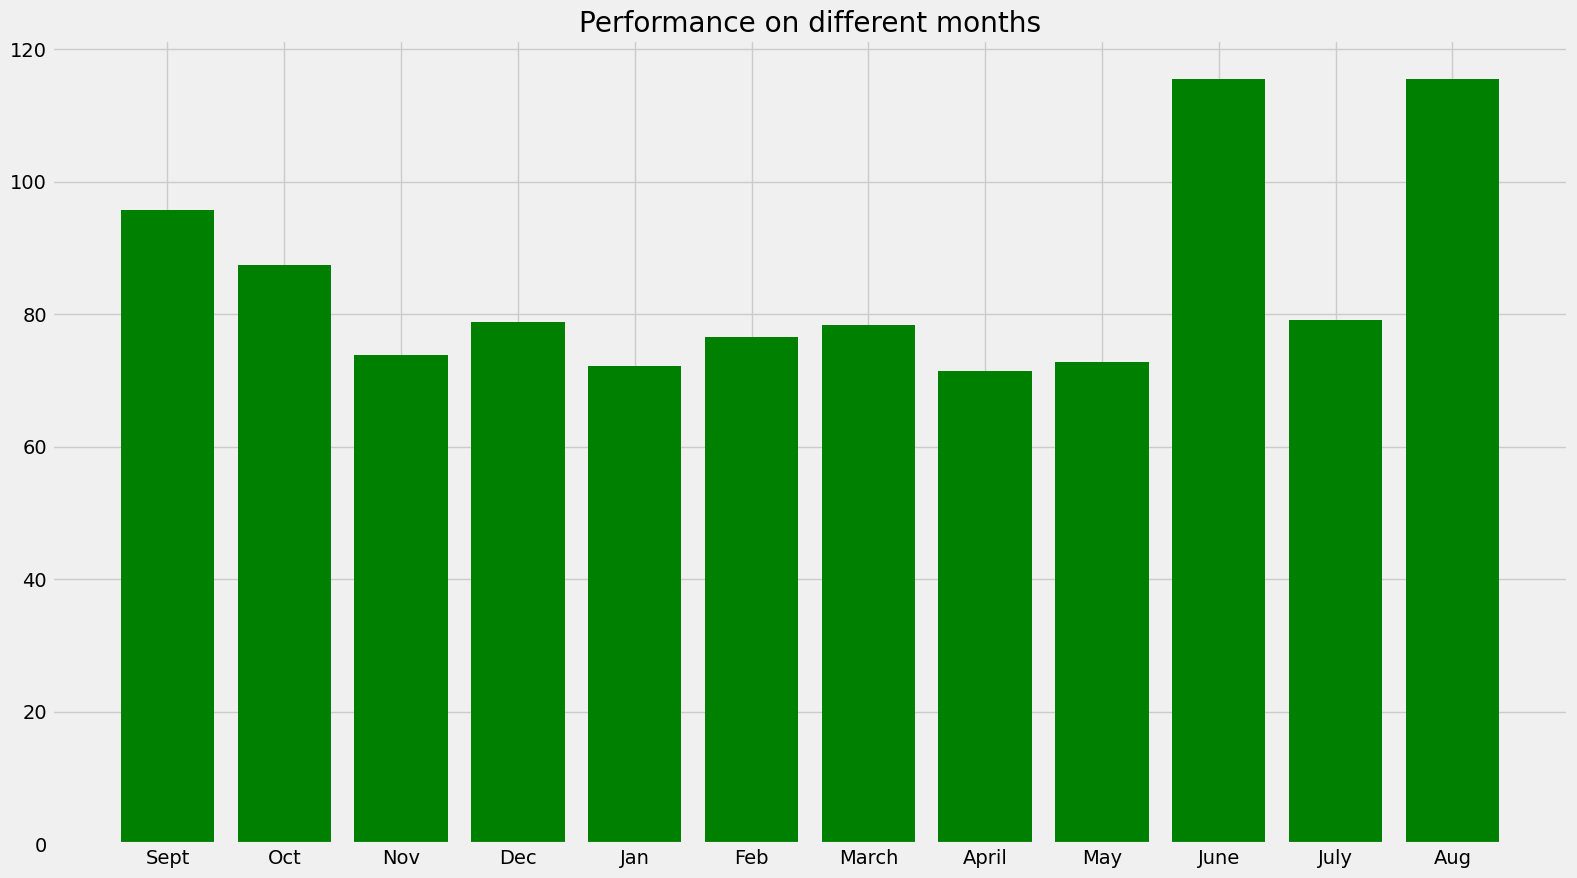

In [ ]:
models = pt.get_best_model_pr_month(month_dir)
pt.evaluate_monthly_multiple(models)

## Performance on single datapoints on worst month vs best month
* Note that we randomly select datapoints for visualization - if the given patch looks boring, then just restart the kernel and run again :-) 

100%|█████████████████████████████████████████████| 1/1 [00:00<00:00, 39.46it/s]
0it [00:00, ?it/s]


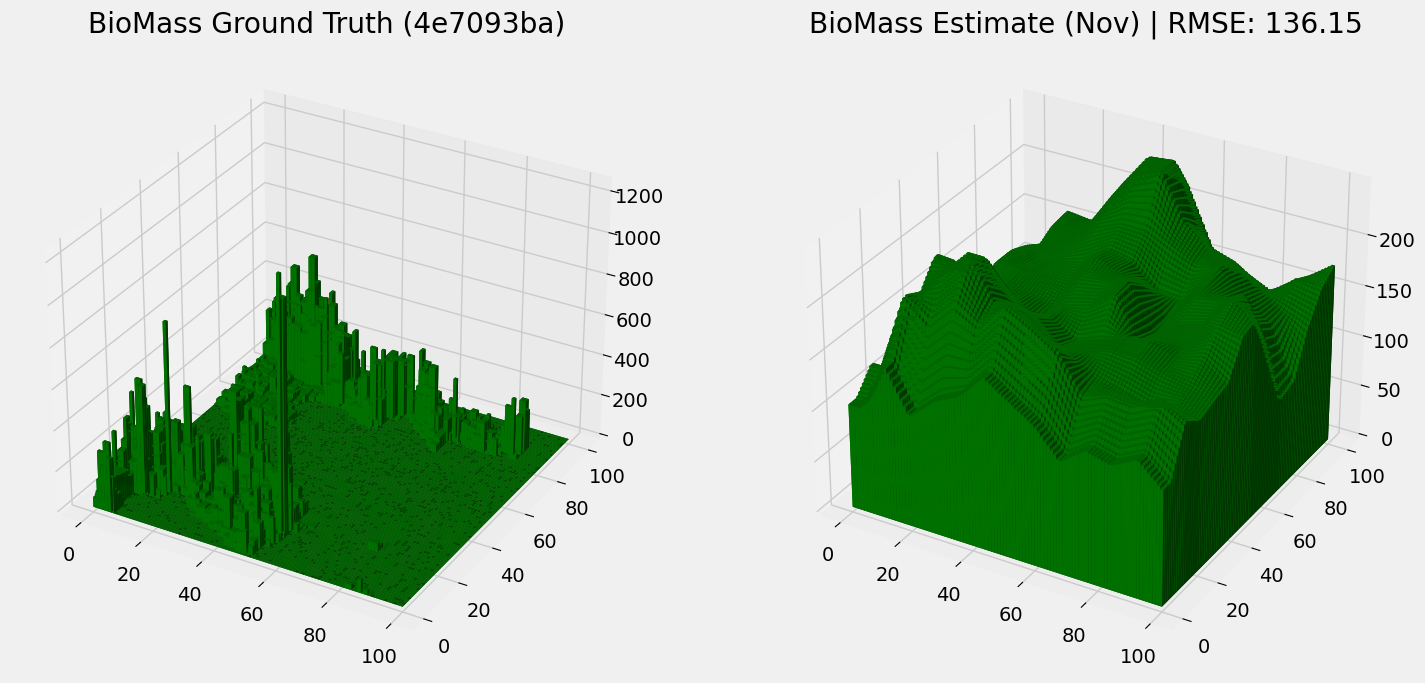

ERROR 136.15361


In [ ]:
month = "Nov"

chip_id, fpath, df = pt.get_subset_from_month(month)
# chip_id = '2637f129'
pt.plot_agbm(chip_id=chip_id, fpath=fpath, df=df, model=model, month=month)

In [8]:
month = "May"

chip_id, fpath, df = pt.get_subset_from_month(month)
# chip_id = '2637f129'
pt.plot_agbm(chip_id=chip_id, fpath=fpath, df=df, model=model, month=month)

NameError: name 'model' is not defined

## Ablation Study on Satellites

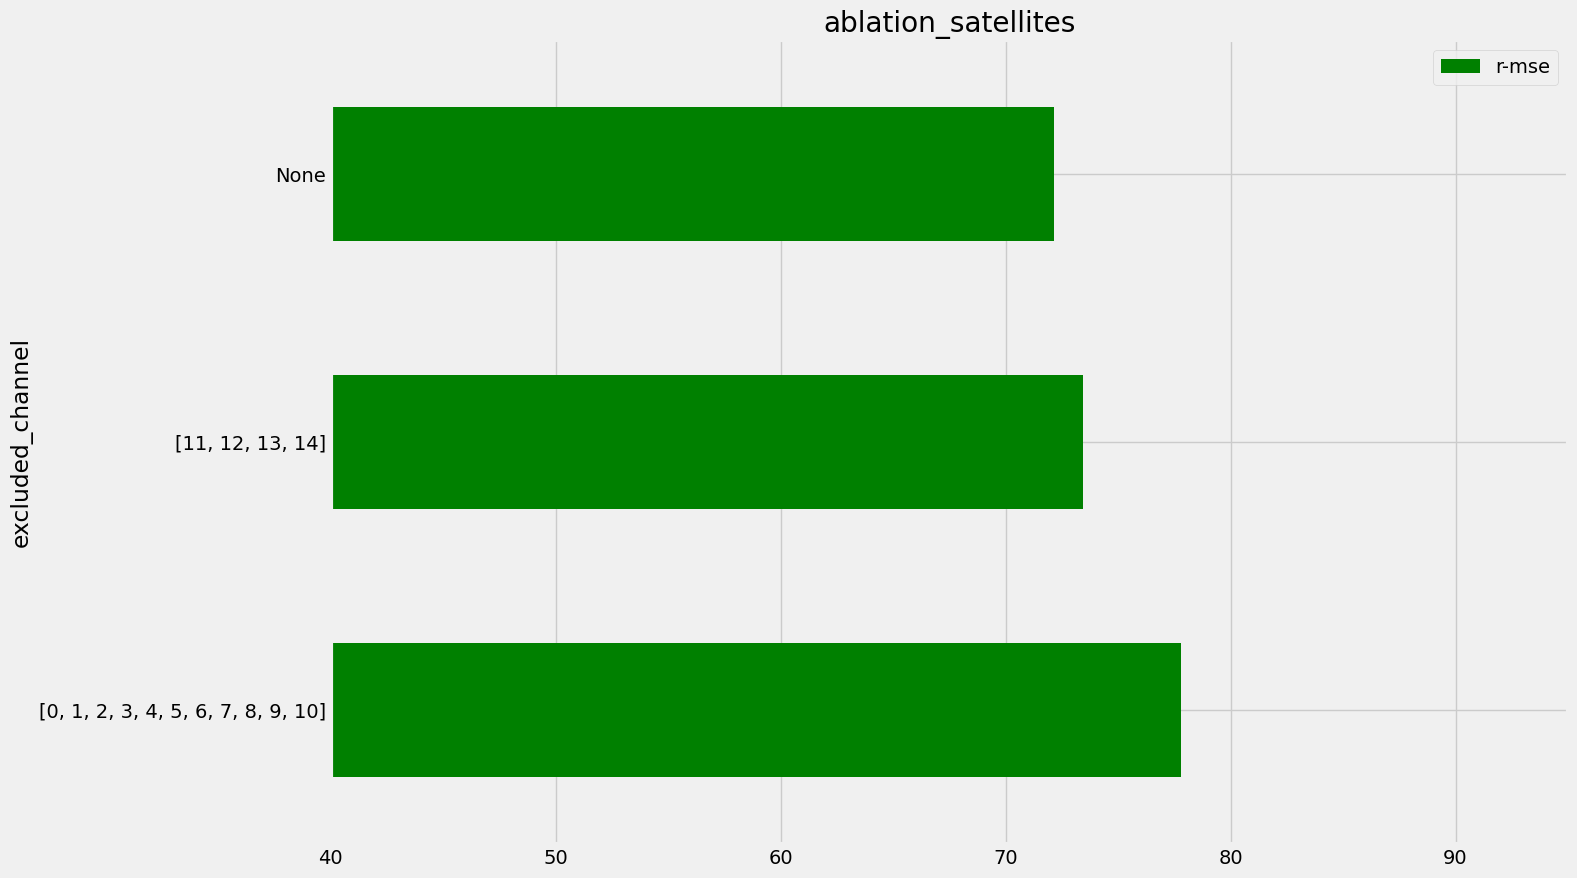

In [5]:
conf = pt.plot_ablation(
    satellite_dir,
    metric="val_loss_median",
    id_="exclude_layer",
    title="ablation_satellites",
)

## Ablation study on bands

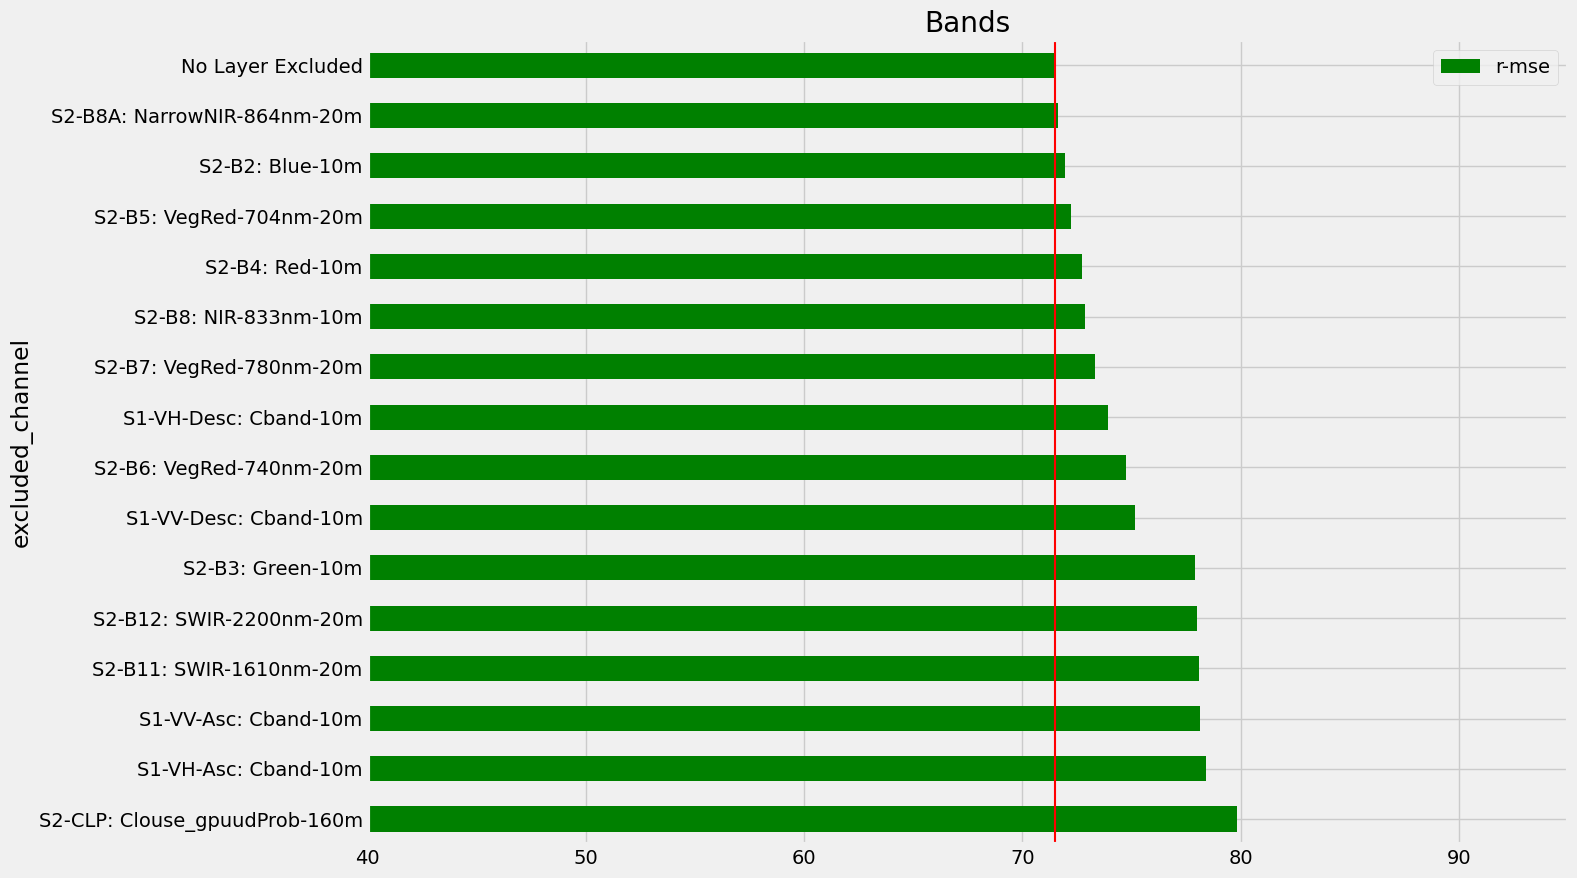

In [13]:
conf = pt.plot_ablation(
    band_dir,
    metric="val_loss_median",
    id_="exclude_layer_name",
    title="Bands",
    vline="No Layer Excluded",
)